<a href="https://colab.research.google.com/github/tskkeimashi/recommender/blob/main/dummy_gejala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd

df = pd.read_excel('dummy_gejala.xlsx', index_col = 0)
df.head()

,Pain_located_in,Triggered_or_wersenend_by,Relieved_by,Accompanied_by,OP_1,OP_2
Pain_is,,,,,,
Hilang timbul,Perut bawah pusar,Makan makanan tertentu,Perubahan posisi duduk/tidur,Pup berair dan mudah pecah,Pup hitam atau berdarah,Diare
Hilang timbul,Perut tengah kanan,Siklus menstruasi,Makan makanan tertentu,Kentut,Sering ingin BAB dan sulit ditahan,Ruam
Perih,Perut tengah kanan,"Batuk, atau gerakan lain",Perubahan posisi duduk/tidur,Pup berair dan mudah pecah,Kentut,Diare
Kronis,"Nyeri dirasakan di perut, namun menyebar ke da...",Minum alkohol,Antasida,Sering ingin BAB dan sulit ditahan,Pup berair dan mudah pecah,Penurunan berat badan yang tidak bisa dijelaskan
Tiba-tiba,"Nyeri dirasakan di perut, namun menyebar ke da...","Batuk, atau gerakan lain",Perubahan posisi duduk/tidur,Kentut,Perut keroncongan,[kosong]


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Hilang timbul to Dirasakan terus-menerus
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Pain_located_in            10000 non-null  object
 1   Triggered_or_wersenend_by  10000 non-null  object
 2   Relieved_by                10000 non-null  object
 3   Accompanied_by             10000 non-null  object
 4   OP_1                       10000 non-null  object
 5   OP_2                       10000 non-null  object
dtypes: object(6)
memory usage: 546.9+ KB


In [184]:
#Dari df.info(), tidak terdeteksi adanya nilai null pada dataframe. untuk memastikan, digunakan .describe() untuk mengeksplor data lebih lanjut.

In [185]:
df.describe()

,Pain_located_in,Triggered_or_wersenend_by,Relieved_by,Accompanied_by,OP_1,OP_2
count,10000,10000,10000,10000,10000,10000
unique,10,5,6,14,15,15
top,Ulu hati,Minum alkohol,Menghindari makanan tertentu,Pup berair dan mudah pecah,[kosong],[kosong]
freq,1024,2071,1742,749,1000,2000


In [186]:
#Dari proses di atas dapat diketahui bahwa pada kolom OP_1 dan OP_2 terdapat nilai null, sehingga pada proses selanjutnya akan dilakukan data cleaning.

In [187]:
df = df[df['OP_1'] != '[kosong]']
df = df[df['OP_2'] != '[kosong]']
df

,Pain_located_in,Triggered_or_wersenend_by,Relieved_by,Accompanied_by,OP_1,OP_2
Pain_is,,,,,,
Hilang timbul,Perut bawah pusar,Makan makanan tertentu,Perubahan posisi duduk/tidur,Pup berair dan mudah pecah,Pup hitam atau berdarah,Diare
Hilang timbul,Perut tengah kanan,Siklus menstruasi,Makan makanan tertentu,Kentut,Sering ingin BAB dan sulit ditahan,Ruam
Perih,Perut tengah kanan,"Batuk, atau gerakan lain",Perubahan posisi duduk/tidur,Pup berair dan mudah pecah,Kentut,Diare
Kronis,"Nyeri dirasakan di perut, namun menyebar ke da...",Minum alkohol,Antasida,Sering ingin BAB dan sulit ditahan,Pup berair dan mudah pecah,Penurunan berat badan yang tidak bisa dijelaskan
Tumpul,Perut bawah pusar,Makan makanan tertentu,Makan makanan tertentu,Sensasi berdenyut dekat pusar,Diare,Diare
...,...,...,...,...,...,...
Memburuk,Perut tengah pusar,Stres,Minum lebih banyak air,Ruam,Obstipasi,Demam
Hilang timbul,Perut bawah pusar,Makan makanan tertentu,Menghindari makanan tertentu,Penurunan berat badan yang tidak bisa dijelaskan,Kentut,Pup berair dan mudah pecah
Dirasakan terus-menerus,Perut tengah kiri,"Batuk, atau gerakan lain",Perubahan posisi duduk/tidur,Sering ingin BAB dan sulit ditahan,Demam,Diare


In [188]:
df.describe() #data sudah bersih

,Pain_located_in,Triggered_or_wersenend_by,Relieved_by,Accompanied_by,OP_1,OP_2
count,8000,8000,8000,8000,8000,8000
unique,10,5,6,14,14,14
top,Perut tengah kiri,Minum alkohol,Menghindari makanan tertentu,Pup berair dan mudah pecah,Pup hitam atau berdarah,Ruam
freq,822,1662,1382,606,600,622


In [189]:
df_copy = df.copy()

from sklearn import preprocessing
le = preprocessing.LabelEncoder() #untuk mengubah data kategorikal ke numerik
df = df.apply(le.fit_transform)
df.head()

,Pain_located_in,Triggered_or_wersenend_by,Relieved_by,Accompanied_by,OP_1,OP_2
Pain_is,,,,,,
Hilang timbul,5,1,5,8,9,2
Hilang timbul,6,3,2,3,13,10
Perih,6,0,5,8,3,2
Kronis,0,2,0,13,8,6
Tumpul,5,1,2,12,2,2


In [190]:
pip install kmodes #untuk clustering

In [191]:
from kmodes.kmodes import KModes
cost =[]
for num_clusters in list(range(1,20)):
  kmode = KModes(n_clusters = num_clusters, init='Cao', n_init=1, verbose=1)
  kmode.fit_predict(df)
  cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 42306.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 38898.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 36670.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 35185.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34040.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 33512.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 32983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration:

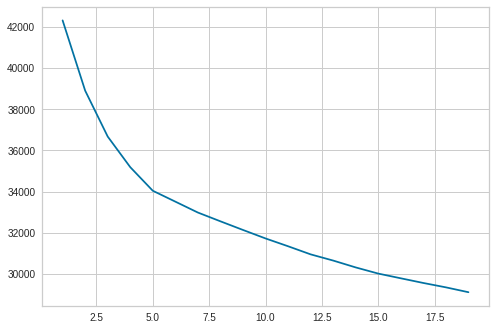

In [192]:
import matplotlib.pyplot as plt
y = np.array([i for i in range (1,20,1)])
plt.plot(y, cost)

In [193]:
#elbow = 5
km_cao = KModes(n_clusters = 5, init='Cao', n_init =1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34040.0


In [194]:
fitClusters_cao #hasil clustering/pelabelan

array([0, 1, 2, ..., 2, 4, 2], dtype=uint16)

In [195]:
df = df_copy.reset_index()

In [196]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index'], axis=1)
combinedDf.head()
df.to_csv(r'xx.csv', index=False)

In [197]:
#membagi ke training dan testing dataset lalu menyimpannya dalam format csv
train = combinedDf[:2000]
test = combinedDf[2000:]
test = test.drop(columns=['cluster_predicted'])
train.to_csv(r'train.csv', index=False)
test.to_csv(r'test.csv', index=False)

In [215]:
class Information(): 
    def __init__(self):
        print("Objek untuk tampilkan informasi (missing value)")

    def _get_missing_values(self,data):
        missing_values = data.isnull().sum()         #missing value tiap fitur
        missing_values.sort_values(ascending=False, inplace=True)
        return missing_values

    def info(self,data):
        feature_dtypes=data.dtypes
        self.missing_values=self._get_missing_values(data)
        print("-" * 50) #menampilkan missing value (null)
        print("{:16} {:16} {:25} {:16}".format("Feature Name".upper(),
                                            "Data Format".upper(),
                                            "# of Missing Values".upper(),
                                            "Samples".upper()))
        for feature_name, dtype, missing_value in zip(self.missing_values.index.values,
                                                      feature_dtypes[self.missing_values.index.values],
                                                      self.missing_values.values):
            print("{:18} {:19} {:19} ".format(feature_name, str(dtype), str(missing_value)), end="")
            for v in data[feature_name].values[:10]:
                print(v, end=",")
            print()
        print("-"*50)

In [216]:
from sklearn.preprocessing import LabelEncoder
class Preprocess():
    def __init__(self):
        print("Objek untuk preprocessing")

    def feature_engineering(self, data, engineering_strategies=1):
        if engineering_strategies==1:
            return self._feature_engineering1(data)
        return data

    def _feature_engineering1(self,data):
        return data

    def _label_encoder(self,data): #mengubah data kategorikal ke numerik
        labelEncoder=LabelEncoder()
        for column in data.columns.values:
            if 'int64'==data[column].dtype or 'float64'==data[column].dtype or 'int64'==data[column].dtype:
                continue
            labelEncoder.fit(data[column])
            data[column]=labelEncoder.transform(data[column])
        return data

    def _get_dummies(self, data, prefered_columns=None): #one hot encoding
        if prefered_columns is None:
            columns=data.columns.values
            non_dummies=None
        else:
            non_dummies=[col for col in data.columns.values if col not in prefered_columns ]
            columns=prefered_columns
        dummies_data=[pd.get_dummies(data[col],prefix=col) for col in columns]

        if non_dummies is not None:
            for non_dummy in non_dummies:
                dummies_data.append(data[non_dummy])

        return pd.concat(dummies_data, axis=1)

In [217]:
class PreprocessStrategy():
    def __init__(self):
        self.data=None
        self._preprocessor=Preprocess()

    def strategy(self, data, strategy_type="strategy1"):
        self.data=data
        if strategy_type=='strategy1':
            self._strategy1()
        elif strategy_type=='strategy2':
            self._strategy2()

        return self.data

    def _base_strategy(self):
        self.data = self._preprocessor.feature_engineering(self.data, 1)


        self.data = self._preprocessor._label_encoder(self.data)

    def _strategy1(self):
        self._base_strategy()

        self.data=self._preprocessor._get_dummies(self.data,
                                        prefered_columns=['OP_1', 'OP_2', 'Pain_is'])

    def _strategy2(self):
        self._base_strategy()

        self.data=self._preprocessor._get_dummies(self.data,
                                        prefered_columns=None)#berlaku ke semua kolom

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

class simpleml():
    def __init__(self):
        print("simple ml model")
        self.gridSearchCV=None
        self.clf_and_params=list()
        self._initialize_clf_and_params()

    def _initialize_clf_and_params(self):
        clf= KNeighborsClassifier()
        params={'n_neighbors':[5,7,9,11,13,15],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance']
          }
        self.clf_and_params.append((clf, params))

        clf=LogisticRegression()
        params={'penalty':['l1', 'l2'],
                'C':np.logspace(0, 4, 10)
                }
        self.clf_and_params.append((clf, params))

        clf = SVC()
        params = [ {'C': [1, 10], 'kernel': ['linear']},
                   {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
        self.clf_and_params.append((clf, params))

        clf=DecisionTreeClassifier()
        params={'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1],
          'random_state':[123]}
        self.clf_and_params.append((clf,params))

        clf = RandomForestClassifier()
        params = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
        self.clf_and_params.append((clf, params))

    def fit_predict_save(self, X_train, X_test, y_train, submission_id, strategy_type):
        self.X_train=X_train
        self.X_test=X_test
        self.y_train=y_train
        self.submission_id=submission_id
        self.strategy_type=strategy_type

        clf_and_params = self.get_clf_and_params()
        models=[]
        self.results={}
        for clf, params in clf_and_params:
            self.current_clf_name = clf.__class__.__name__
            grid_search_clf = GridSearchCV(clf, params, cv=5)
            grid_search_clf.fit(self.X_train, self.y_train) #fit ke data training
            self.Y_pred = grid_search_clf.predict(self.X_test) #predict ke data testing
            clf_train_acc = round(grid_search_clf.score(self.X_train, self.y_train) * 100, 2) #hitung akurasi
            print(self.current_clf_name, " .")
            self.results[self.current_clf_name]=clf_train_acc
            models.append(clf)
            self.save_result()
            print()
        
    def show_result(self):
        for clf_name, train_acc in self.results.items():
                  print("{} Akurasi train {:.3f}".format(clf_name, train_acc))
        
    def save_result(self):
        Submission = pd.DataFrame({'Pain_is': self.submission_id,
                                           'cluster_predicted': self.Y_pred})
        file_name="{}_{}.csv".format(self.strategy_type,self.current_clf_name.lower())
        Submission.to_csv(file_name, index=False) #menyimpan hasil klasifikasi oleh model ke file .csv
        print("Submission saved file name: ",file_name)

    def get_clf_and_params(self):
        return self.clf_and_params

    def add(self,clf, params):
        self.clf_and_params.append((clf, params))

In [226]:
class ObjectOriented():
    def __init__(self, train, test):
        print("OO")
        self.testPain_is=test['Pain_is']
        self.number_of_train=train.shape[0]
        self.y_train=train['cluster_predicted'] #nilai y train
        self.train=train.drop('cluster_predicted', axis=1) #nilai x train
        self.test=test
        self.all_data=self._get_all_data()
        self._info=Information() #buat instance
        self.preprocessStrategy = PreprocessStrategy()
        self.simple_ml = simpleml()
        
    def _get_all_data(self):
        return pd.concat([self.train, self.test]) #gabung data untuk diperiksa missing valuenya

    def information(self):
        self._info.info(self.all_data)

    def preprocessing(self, strategy_type):
        self.strategy_type=strategy_type
        self.all_data = self.preprocessStrategy.strategy(self._get_all_data(), strategy_type)

    def machine_learning(self):
        self._get_train_and_test()

        self.simple_ml.fit_predict_save(self.X_train,
                                          self.X_test,
                                          self.y_train,
                                          self.testPain_is,
                                          self.strategy_type)
    def show_result(self):
        self.simple_ml.show_result()

    def _get_train_and_test(self):
        self.X_train=self.all_data[:self.number_of_train]
        self.X_test=self.all_data[self.number_of_train:]

In [227]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
objectOriented=ObjectOriented(train, test)

OO
Objek untuk tampilkan informasi (missing value)
Objek untuk preprocessing
simple ml model


In [228]:
objectOriented.information()

--------------------------------------------------
FEATURE NAME     DATA FORMAT      # OF MISSING VALUES       SAMPLES         
OP_2               object              0                   Diare,Ruam,Diare,Penurunan berat badan yang tidak bisa dijelaskan,Diare,Demam,Penurunan berat badan yang tidak bisa dijelaskan,Ruam,Obstipasi,Penurunan berat badan yang tidak bisa dijelaskan,
OP_1               object              0                   Pup hitam atau berdarah,Sering ingin BAB dan sulit ditahan,Kentut,Pup berair dan mudah pecah,Diare,Obstipasi,Diare,Bengkak di perut,Sembelit,Ruam,
Accompanied_by     object              0                   Pup berair dan mudah pecah,Kentut,Pup berair dan mudah pecah,Sering ingin BAB dan sulit ditahan,Sensasi berdenyut dekat pusar,Penurunan berat badan yang tidak bisa dijelaskan,Pup hitam atau berdarah,Kentut,Kentut,Perut keroncongan,
Relieved_by        object              0                   Perubahan posisi duduk/tidur,Makan makanan tertentu,Perubahan pos

In [229]:
objectOriented.preprocessing(strategy_type='strategy1')

In [230]:
objectOriented.information()

--------------------------------------------------
FEATURE NAME     DATA FORMAT      # OF MISSING VALUES       SAMPLES         
Accompanied_by     int64               0                   8,3,8,13,12,6,9,3,3,7,
OP_1_10            uint8               0                   0,0,0,0,0,0,0,0,0,1,
OP_2_4             uint8               0                   0,0,0,0,0,0,0,0,0,0,
OP_2_3             uint8               0                   0,0,0,0,0,0,0,0,0,0,
OP_2_2             uint8               0                   1,0,1,0,1,0,0,0,0,0,
OP_2_1             uint8               0                   0,0,0,0,0,1,0,0,0,0,
OP_2_0             uint8               0                   0,0,0,0,0,0,0,0,0,0,
OP_1_13            uint8               0                   0,1,0,0,0,0,0,0,0,0,
OP_1_12            uint8               0                   0,0,0,0,0,0,0,0,0,0,
OP_1_11            uint8               0                   0,0,0,0,0,0,0,0,1,0,
OP_1_9             uint8               0                   1,0,0,0,0,0

In [231]:
objectOriented.machine_learning()

KNeighborsClassifier  .
Submission saved file name:  strategy1_kneighborsclassifier.csv



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

LogisticRegression  .
Submission saved file name:  strategy1_logisticregression.csv

SVC  .
Submission saved file name:  strategy1_svc.csv

DecisionTreeClassifier  .
Submission saved file name:  strategy1_decisiontreeclassifier.csv

RandomForestClassifier  .
Submission saved file name:  strategy1_randomforestclassifier.csv



In [232]:
objectOriented.show_result()

KNeighborsClassifier Akurasi train 100.000
LogisticRegression Akurasi train 55.400
SVC Akurasi train 54.950
DecisionTreeClassifier Akurasi train 75.800
RandomForestClassifier Akurasi train 72.100


Referensi: https://www.kaggle.com/serkanpeldek/object-oriented-titanics